### Here I work with noisy data full of meaningless information. At first I clean rows and work with them a bit 

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path_to_files = '/home/jupyter-v.hohlov-16/shared/homeworks/python_ds_miniprojects/4/data/'

#### 1. combining code in one dataframe 

In [18]:
df = pd.DataFrame()
for root, dirs, files in os.walk(path_to_files):
    for file in files:
        if file.endswith(".csv"):
            
            data_path = f'{root}/{file}' # create full link to csv
    
            small_df = pd.read_csv(data_path)  
            small_df['name'] = link.split('/')[-2]
            small_df['date'] = link.split('/')[-3]

            df = df.append(small_df)

In [19]:
df

,Unnamed: 0,product_id,quantity,name,date
0,0,27,4,Vasiliy_Ivanov,2020-12-07
1,1,89,1,Vasiliy_Ivanov,2020-12-07
2,2,33,2,Vasiliy_Ivanov,2020-12-07
3,3,8,3,Vasiliy_Ivanov,2020-12-07
4,4,16,1,Vasiliy_Ivanov,2020-12-07
...,...,...,...,...,...
0,0,18,4,Vasiliy_Ivanov,2020-12-07
1,1,94,4,Vasiliy_Ivanov,2020-12-07
0,0,95,2,Vasiliy_Ivanov,2020-12-07
1,1,83,3,Vasiliy_Ivanov,2020-12-07


In [4]:
result_df = result_df.reset_index(drop = True).drop(columns = 'Unnamed: 0')

In [5]:
result_df.quantity.sum()

480

#### or:

In [6]:
from pathlib import Path

In [7]:
path = '/home/jupyter-v.hohlov-16/shared/homeworks/python_ds_miniprojects/4/data/'
dir(Path)

['__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__fspath__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__truediv__',
 '_accessor',
 '_cached_cparts',
 '_closed',
 '_cparts',
 '_drv',
 '_format_parsed_parts',
 '_from_parsed_parts',
 '_from_parts',
 '_hash',
 '_init',
 '_make_child',
 '_make_child_relpath',
 '_opener',
 '_parse_args',
 '_parts',
 '_pparts',
 '_raise_closed',
 '_raw_open',
 '_root',
 '_str',
 'absolute',
 'anchor',
 'as_posix',
 'as_uri',
 'chmod',
 'cwd',
 'drive',
 'exists',
 'expanduser',
 'glob',
 'group',
 'home',
 'is_absolute',
 'is_block_device',
 'is_char_device',
 'is_dir',
 'is_fifo',
 'is_file',
 'is_mount',
 'is_reserved',
 'is_socket',
 

In [15]:
df = pd.DataFrame()

for current_path, dirs, files in os.walk(path):
    for file in files:
        part_path = Path(current_path)

        # full path of file:
        data_path = part_path / file       

        temp_df = pd.read_csv(data_path)
       
        temp_df['name'] = data_path.parts[-2]
        temp_df['date'] = data_path.parts[-3]
        
        df = pd.concat((df, temp_df))

/home/jupyter-v.hohlov-16/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov/data.csv
/home/jupyter-v.hohlov-16/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov/data.csv
/home/jupyter-v.hohlov-16/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov/data.csv
/home/jupyter-v.hohlov-16/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Kirill_Smirnov/data.csv
/home/jupyter-v.hohlov-16/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Fedorov/data.csv
/home/jupyter-v.hohlov-16/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Petrov/data.csv
/home/jupyter-v.hohlov-16/shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Petr_Petrov/data.csv
/home/jupyter-v.hohlov-16/shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Rostislav_Petrov/data.csv
/home/jupyter-v.hohlov-16/shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Kirill_Smirnov/data.csv
/home/jupyter-v.hohlov-16/shared

#### 2. Which user bought the biggest amount of goods? Lets see the sales-statistic

In [39]:
df.groupby('name', as_index = False) \
.agg({'quantity': 'sum'}) \
.sort_values(['quantity', 'name'], ascending = [False, True]) \

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


#### 3. Top-ten goods 

In [41]:
top_ten_goods = df.groupby('product_id', as_index = False)  \
         .agg({'quantity': 'sum'}) \
         .sort_values('quantity', ascending = False) \
         .head(10)

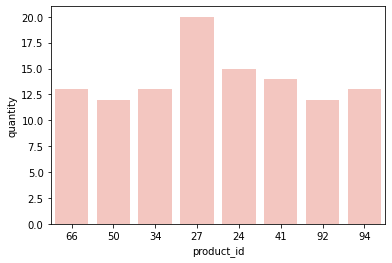

In [8]:
sns.barplot(x = 'product_id', y = 'quantity', data = top_ten_goods, order = [66, 50, 34, 27, 24, 41, 92, 94], color="salmon", alpha = 0.5)

In [9]:
top_ten_goods

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


#### 4. Sales per day

In [299]:
result_df['date'] = pd.to_datetime(result_df.date)

In [308]:
result_df['purchase_day'] = result_df.date.dt.day

In [313]:
sales_per_day = result_df.groupby('purchase_day', as_index = False) \
                         .agg({'quantity': 'sum'}) 

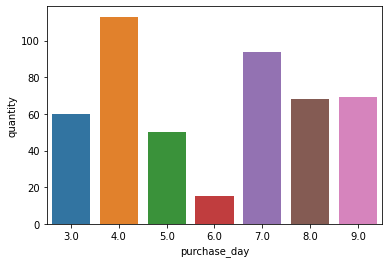

In [314]:
sns.barplot(x = 'purchase_day', y = 'quantity', data = sales_per_day)

In [16]:
result_df

,product_id,quantity,name,date
0,27,4,NaN,NaN
1,89,1,NaN,NaN
2,33,2,NaN,NaN
3,8,3,NaN,NaN
4,16,1,NaN,NaN
...,...,...,...,...
156,18,4,Petr_Fedorov,2020-12-07
157,94,4,Petr_Fedorov,2020-12-07
158,95,2,Vasiliy_Ivanov,2020-12-07
159,83,3,Vasiliy_Ivanov,2020-12-07


#### 5. How much users have bought the same product more than two times in different days?

In [34]:
result_df.drop_duplicates(subset = ['name', 'product_id', 'date'])\
         .groupby(['name', 'product_id'])\
         .agg({'date': 'count'})\
         .query('date > 1')

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2


In [35]:
result_df.drop_duplicates(subset = ['name', 'product_id', 'date'])

,product_id,quantity,name,date
0,27,4,NaN,NaN
1,89,1,NaN,NaN
2,33,2,NaN,NaN
3,8,3,NaN,NaN
4,16,1,NaN,NaN
...,...,...,...,...
156,18,4,Petr_Fedorov,2020-12-07
157,94,4,Petr_Fedorov,2020-12-07
158,95,2,Vasiliy_Ivanov,2020-12-07
159,83,3,Vasiliy_Ivanov,2020-12-07
